### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('HDFC data.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Change(%)
0,0,21 Jun 2019,1207.10,1213.00,1214.85,1202.83,3312565,-0.50%
1,1,24 Jun 2019,1208.98,1205.98,1215.30,1205.00,1728750,0.16%
2,2,25 Jun 2019,1214.35,1209.93,1220.75,1201.50,2224950,0.44%
3,3,26 Jun 2019,1233.95,1212.35,1235.00,1211.00,2633409,1.61%
4,4,27 Jun 2019,1231.15,1234.38,1247.25,1228.08,4969809,-0.23%


In [6]:
df.tail()

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Change(%)
1232,1232,10 Jun 2024,1561.30,1574.00,1580.65,1557.6,11227029,-0.77%
1233,1233,11 Jun 2024,1564.80,1556.00,1571.00,1552.2,14772663,0.22%
1234,1234,12 Jun 2024,1574.15,1575.00,1588.30,1566.4,19640218,0.60%
1235,1235,13 Jun 2024,1580.75,1581.75,1585.70,1574.0,12060096,0.42%
1236,1236,14 Jun 2024,1596.90,1584.00,1599.00,1577.7,12770277,1.02%


In [8]:
df1=df.reset_index()['Price']

In [9]:
df1

0       1207.10
1       1208.98
2       1214.35
3       1233.95
4       1231.15
         ...   
1232    1561.30
1233    1564.80
1234    1574.15
1235    1580.75
1236    1596.90
Name: Price, Length: 1237, dtype: float64

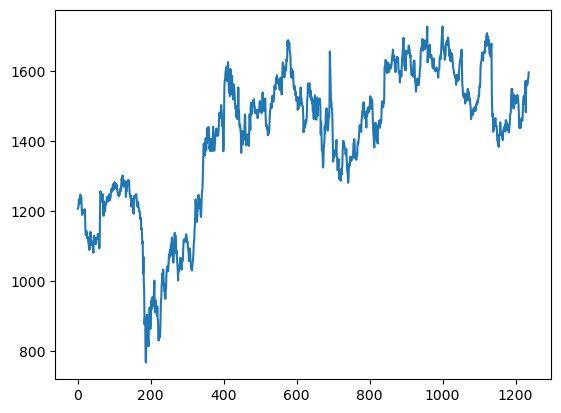

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       1207.10
1       1208.98
2       1214.35
3       1233.95
4       1231.15
         ...   
1232    1561.30
1233    1564.80
1234    1574.15
1235    1580.75
1236    1596.90
Name: Price, Length: 1237, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\nikhi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
print(df1)

[[0.45747007]
 [0.45942738]
 [0.46501822]
 ...
 [0.83961478]
 [0.84648621]
 [0.86330036]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [70]:
training_size,test_size

(804, 433)

In [71]:
train_data

array([[0.45747007],
       [0.45942738],
       [0.46501822],
       [0.48542426],
       [0.48250911],
       [0.47285789],
       [0.49461739],
       [0.49953149],
       [0.49675169],
       [0.4937012 ],
       [0.48776679],
       [0.45507548],
       [0.43922957],
       [0.44422697],
       [0.45380531],
       [0.44690265],
       [0.44735034],
       [0.44549714],
       [0.44875586],
       [0.45627277],
       [0.4374076 ],
       [0.39659552],
       [0.37902134],
       [0.38807913],
       [0.39076523],
       [0.3862051 ],
       [0.36902655],
       [0.37317022],
       [0.37285789],
       [0.3573139 ],
       [0.35344092],
       [0.33516918],
       [0.34029151],
       [0.33763665],
       [0.36322749],
       [0.38865174],
       [0.35656429],
       [0.36130141],
       [0.36038522],
       [0.3495367 ],
       [0.35668922],
       [0.35942738],
       [0.33248308],
       [0.32654867],
       [0.37520042],
       [0.37717855],
       [0.37069235],
       [0.36 

In [72]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [73]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [74]:
print(X_train.shape), print(y_train.shape)

(703, 100)
(703,)


(None, None)

In [75]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

11/11 [==============================] - 14s 470ms/step - loss: 0.1576 - val_loss: 0.0203
Epoch 2/100
11/11 [==============================] - 3s 237ms/step - loss: 0.0213 - val_loss: 0.0165
Epoch 3/100
11/11 [==============================] - 3s 240ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 4/100
11/11 [==============================] - 3s 248ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 5/100
11/11 [==============================] - 3s 242ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 6/100
11/11 [==============================] - 3s 235ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 7/100
11/11 [==============================] - 2s 230ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 8/100
11/11 [==============================] - 3s 234ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 9/100
11/11 [==============================] - 3s 238ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 10/100
11/11 [==============================] - 3s 235ms/step - loss: 0.0042 - val_

11/11 [==============================] - 3s 243ms/step - loss: 0.0015 - val_loss: 9.1463e-04
Epoch 80/100
11/11 [==============================] - 3s 237ms/step - loss: 0.0014 - val_loss: 7.7090e-04
Epoch 81/100
11/11 [==============================] - 3s 240ms/step - loss: 0.0013 - val_loss: 7.6882e-04
Epoch 82/100
11/11 [==============================] - 3s 238ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 83/100
11/11 [==============================] - 3s 242ms/step - loss: 0.0016 - val_loss: 8.1469e-04
Epoch 84/100
11/11 [==============================] - 3s 245ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 85/100
11/11 [==============================] - 2s 228ms/step - loss: 0.0013 - val_loss: 7.2794e-04
Epoch 86/100
11/11 [==============================] - 2s 213ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 87/100
11/11 [==============================] - 2s 220ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 88/100
11/11 [==============================] - 3s 238ms/step - loss:

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.15.0'

In [56]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 48ms/step


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [78]:
y_train=scaler.inverse_transform(y_train.reshape(-1, 1))
ytest=scaler.inverse_transform(ytest.reshape(-1, 1))

In [79]:
y_train

array([[1273.35],
       [1283.35],
       [1264.75],
       [1271.1 ],
       [1275.05],
       [1278.4 ],
       [1265.3 ],
       [1274.95],
       [1265.75],
       [1255.4 ],
       [1251.65],
       [1245.6 ],
       [1246.05],
       [1242.95],
       [1249.5 ],
       [1248.75],
       [1263.6 ],
       [1263.85],
       [1257.35],
       [1271.1 ],
       [1292.35],
       [1288.8 ],
       [1296.7 ],
       [1302.4 ],
       [1289.15],
       [1270.45],
       [1275.  ],
       [1282.15],
       [1272.1 ],
       [1278.6 ],
       [1286.75],
       [1268.4 ],
       [1240.95],
       [1260.6 ],
       [1257.3 ],
       [1271.4 ],
       [1282.7 ],
       [1286.  ],
       [1289.5 ],
       [1284.25],
       [1287.65],
       [1278.15],
       [1254.9 ],
       [1244.35],
       [1240.85],
       [1244.85],
       [1244.55],
       [1213.2 ],
       [1223.2 ],
       [1235.85],
       [1226.05],
       [1226.3 ],
       [1198.7 ],
       [1192.8 ],
       [1229.8 ],
       [12

In [80]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

37.33229962324638

In [81]:
### Test Data RMSE
np.sqrt(mean_squared_error(ytest,test_predict))

30.558798879553258

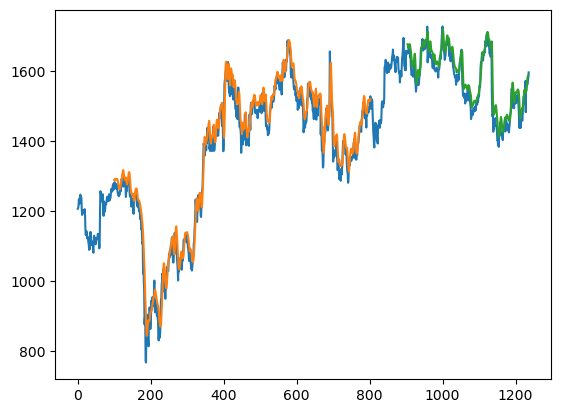

In [82]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
len(test_data)

433

In [85]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape


(1, 100)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
temp_input

[0.731858407079646,
 0.7403956272774596,
 0.6867777199375323,
 0.7165018219677252,
 0.6946382092660074,
 0.7152004164497657,
 0.7044247787610619,
 0.7234252993232692,
 0.7273815720978655,
 0.7063508589276418,
 0.7049973971889639,
 0.7042165538781883,
 0.6894846434148881,
 0.6614783966684018,
 0.6620510150963038,
 0.6478917230609057,
 0.6525247267048412,
 0.6416970327954189,
 0.6729307652264446,
 0.6790213430504947,
 0.6761061946902654,
 0.7148360229047371,
 0.6990629880270692,
 0.6786569495054658,
 0.6797501301405516,
 0.6815200416449766,
 0.6792816241540865,
 0.6680895366996357,
 0.6618427902134306,
 0.690317542946382,
 0.690317542946382,
 0.6923477355543989,
 0.700832899531494,
 0.702654867256637,
 0.7062988027069234,
 0.6872462259239979,
 0.7203019260801665,
 0.7211868818323791,
 0.7160333159812599,
 0.7131181676210309,
 0.7062467464862051,
 0.7096824570536179,
 0.6906298802706924,
 0.7059344091618948,
 0.7029151483602288,
 0.6847475273295159,
 0.700676730869339,
 0.708172826652785,

In [88]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8663429]
101
1 day input [0.74039563 0.68677772 0.71650182 0.69463821 0.71520042 0.70442478
 0.7234253  0.72738157 0.70635086 0.7049974  0.70421655 0.68948464
 0.6614784  0.66205102 0.64789172 0.65252473 0.64169703 0.67293077
 0.67902134 0.67610619 0.71483602 0.69906299 0.67865695 0.67975013
 0.68152004 0.67928162 0.66808954 0.66184279 0.69031754 0.69031754
 0.69234774 0.7008329  0.70265487 0.7062988  0.68724623 0.72030193
 0.72118688 0.71603332 0.71311817 0.70624675 0.70968246 0.69062988
 0.70593441 0.70291515 0.68474753 0.70067673 0.70817283 0.73170224
 0.74174909 0.74398751 0.79115044 0.81400312 0.81093181 0.812962
 0.80026028 0.78214472 0.75689745 0.77204581 0.75689745 0.7950026
 0.77511713 0.77032795 0.77459656 0.7736075  0.77261843 0.79312858
 0.78334201 0.79599167 0.78282145 0.78599688 0.76881832 0.7443519
 0.70775638 0.69776158 0.71582509 0.7217595  0.69838626 0.72103071
 0.72503904 0.72706923 0.71952108 0.71993753 0.75471109 0.78032275
 0.79125455 0.7941697  0.77105674 0.77

8 day output [[0.92448413]]
9 day input [0.70635086 0.7049974  0.70421655 0.68948464 0.6614784  0.66205102
 0.64789172 0.65252473 0.64169703 0.67293077 0.67902134 0.67610619
 0.71483602 0.69906299 0.67865695 0.67975013 0.68152004 0.67928162
 0.66808954 0.66184279 0.69031754 0.69031754 0.69234774 0.7008329
 0.70265487 0.7062988  0.68724623 0.72030193 0.72118688 0.71603332
 0.71311817 0.70624675 0.70968246 0.69062988 0.70593441 0.70291515
 0.68474753 0.70067673 0.70817283 0.73170224 0.74174909 0.74398751
 0.79115044 0.81400312 0.81093181 0.812962   0.80026028 0.78214472
 0.75689745 0.77204581 0.75689745 0.7950026  0.77511713 0.77032795
 0.77459656 0.7736075  0.77261843 0.79312858 0.78334201 0.79599167
 0.78282145 0.78599688 0.76881832 0.7443519  0.70775638 0.69776158
 0.71582509 0.7217595  0.69838626 0.72103071 0.72503904 0.72706923
 0.71952108 0.71993753 0.75471109 0.78032275 0.79125455 0.7941697
 0.77105674 0.77787611 0.79526288 0.83758459 0.74487246 0.81634565
 0.82457054 0.83878188 0

16 day output [[0.9652825]]
17 day input [0.64169703 0.67293077 0.67902134 0.67610619 0.71483602 0.69906299
 0.67865695 0.67975013 0.68152004 0.67928162 0.66808954 0.66184279
 0.69031754 0.69031754 0.69234774 0.7008329  0.70265487 0.7062988
 0.68724623 0.72030193 0.72118688 0.71603332 0.71311817 0.70624675
 0.70968246 0.69062988 0.70593441 0.70291515 0.68474753 0.70067673
 0.70817283 0.73170224 0.74174909 0.74398751 0.79115044 0.81400312
 0.81093181 0.812962   0.80026028 0.78214472 0.75689745 0.77204581
 0.75689745 0.7950026  0.77511713 0.77032795 0.77459656 0.7736075
 0.77261843 0.79312858 0.78334201 0.79599167 0.78282145 0.78599688
 0.76881832 0.7443519  0.70775638 0.69776158 0.71582509 0.7217595
 0.69838626 0.72103071 0.72503904 0.72706923 0.71952108 0.71993753
 0.75471109 0.78032275 0.79125455 0.7941697  0.77105674 0.77787611
 0.79526288 0.83758459 0.74487246 0.81634565 0.82457054 0.83878188
 0.82623634 0.82988027 0.83961478 0.84648621 0.86330036 0.8663429
 0.87515986 0.88360727 0.

24 day output [[0.9950259]]
25 day input [0.68152004 0.67928162 0.66808954 0.66184279 0.69031754 0.69031754
 0.69234774 0.7008329  0.70265487 0.7062988  0.68724623 0.72030193
 0.72118688 0.71603332 0.71311817 0.70624675 0.70968246 0.69062988
 0.70593441 0.70291515 0.68474753 0.70067673 0.70817283 0.73170224
 0.74174909 0.74398751 0.79115044 0.81400312 0.81093181 0.812962
 0.80026028 0.78214472 0.75689745 0.77204581 0.75689745 0.7950026
 0.77511713 0.77032795 0.77459656 0.7736075  0.77261843 0.79312858
 0.78334201 0.79599167 0.78282145 0.78599688 0.76881832 0.7443519
 0.70775638 0.69776158 0.71582509 0.7217595  0.69838626 0.72103071
 0.72503904 0.72706923 0.71952108 0.71993753 0.75471109 0.78032275
 0.79125455 0.7941697  0.77105674 0.77787611 0.79526288 0.83758459
 0.74487246 0.81634565 0.82457054 0.83878188 0.82623634 0.82988027
 0.83961478 0.84648621 0.86330036 0.8663429  0.87515986 0.88360727
 0.89156264 0.89902377 0.90600234 0.91253126 0.91866755 0.92448413
 0.93005645 0.93544972 0.

In [89]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [90]:
import matplotlib.pyplot as plt

In [91]:
len(df1)

1237

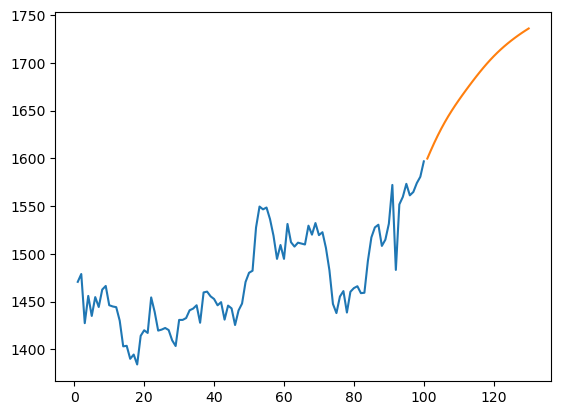

In [92]:
plt.plot(day_new,scaler.inverse_transform(df1[1137:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

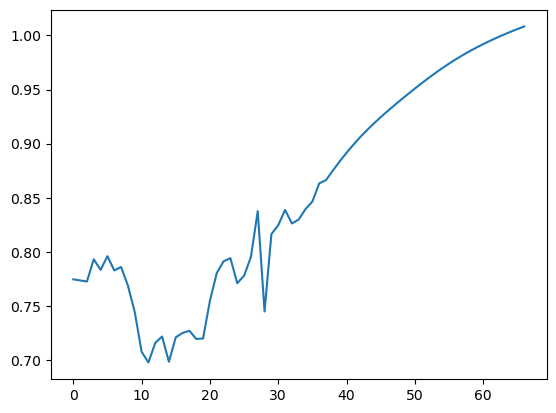

In [93]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [94]:
df3=scaler.inverse_transform(df3).tolist()

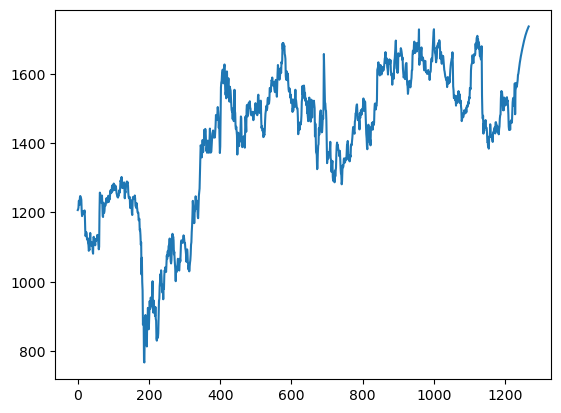

In [95]:
plt.plot(df3)